In [15]:
#%matplotlib notebook
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython import display

In [16]:
path = "Download-Free-Binary-Code-Wallpaper_noisy.bmp"
beta = 1.0
eta = 2.1
h = 0.0

In [17]:
noisy = cv2.imread(path, 0).astype(int)
noisy = np.clip(noisy, 0, 1)
noisy *= 2
noisy -= 1

In [18]:
clean = np.array(noisy, dtype=np.int)

In [5]:
def calc_energy():
    energy = h * np.sum(clean)    
    energy += beta * np.sum(clean[1:] * clean[:-1]) * 2
    energy += beta * np.sum(clean[:,1:] * clean[:,:-1]) * 2
    energy += eta * np.sum(clean * noisy)
    return energy

def calc_energy_change(i ,j):
    diff = h
    if i > 0:
        diff -= beta * clean[i - 1, j]
    if i < clean.shape[0] - 1:
        diff -= beta * clean[i + 1, j]
    if j > 0:
        diff -= beta * clean[i, j - 1]
    if j < clean.shape[1] - 1:
        diff -= beta * clean[i, j + 1]   
    diff -= eta * noisy[i, j]
    diff *= 2
    diff *= clean[i, j] * -1
    return diff

In [20]:
calc_energy()

10370902.2

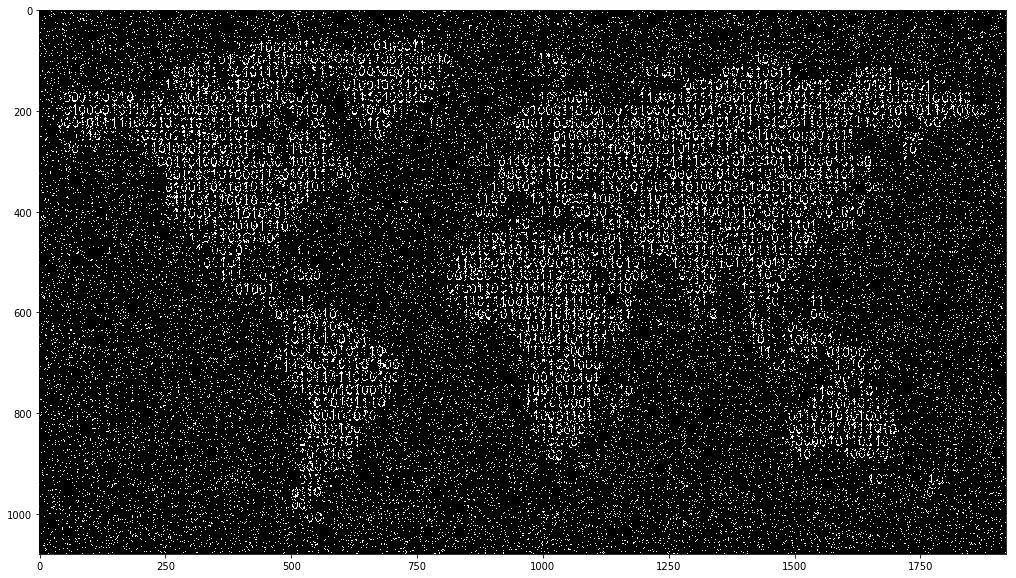

In [11]:
for i in range(10):
    for i in range(100000):
        i = random.randint(0, clean.shape[0] - 1)
        j = random.randint(0, clean.shape[1] - 1)
        if calc_energy_change(i, j) < 0:
            clean[i, j] *= -1
    display.clear_output()
    plt.figure(figsize = (19,10))
    plt.imshow(1 - clean, cmap='Greys')       
    plt.show()

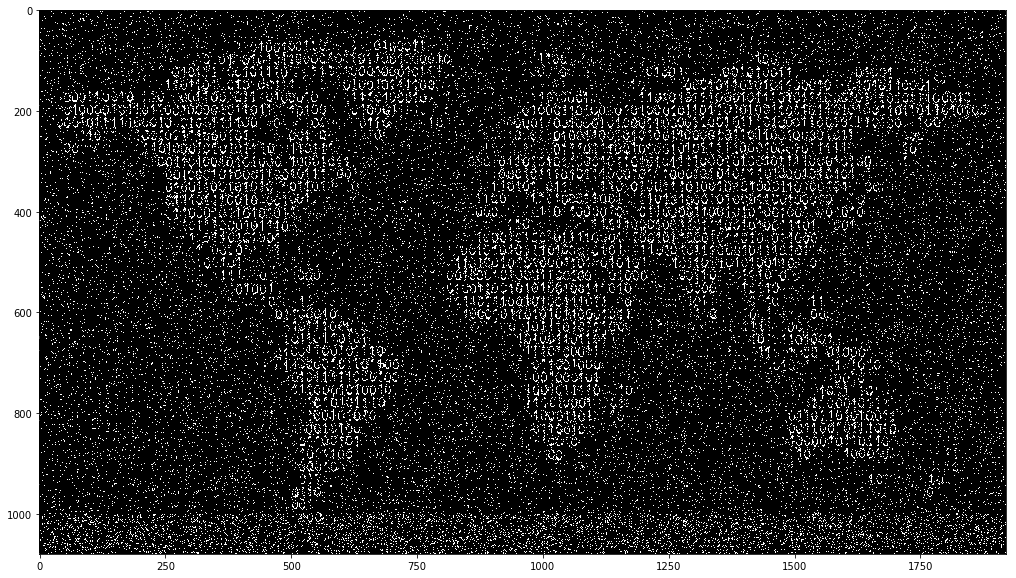

In [19]:
for i in range(clean.shape[0]):
    for j in range(clean.shape[1]):
        if calc_energy_change(i, j) < 0:
            clean[i, j] *= -1
    if i % 100 == 0:
        display.clear_output()
        plt.figure(figsize = (19,10))
        plt.imshow(1 - clean, cmap='Greys')       
        plt.show()